# Imports

In [1]:
from matplotlib import pyplot as plt
from utils import load_pickle, save_pickle, show_mel
import librosa
import numpy as np

import torch

In [7]:
n = '44' # Experiment number

## Loss Graphs

Initialising method and loading main dictionary

In [8]:
def plot_train_hist(train_hist, names, title, ylim=None, epoch=False):
    x = range(len(train_hist[names[0]]))

    plt.figure()
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    
    for n in names:
        
        if(epoch):
            # Specifically 420 since 1680/4. Batch size is 4, Max pairings is 1680
            x = range(len(train_hist[names[0]]) // 420)  
            epoch_wise_hist = []
            for i in range(0, len(train_hist[names[0]]), 420):
                epoch_wise_hist.append(train_hist[n][i])
            plt.plot(x, epoch_wise_hist, label=n)
        else:
            plt.plot(x, train_hist[n], label=n)

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    if(ylim): plt.ylim(ylim)
    
train_hist = load_pickle('../pool/'+n+'/train_hist.pickle')

### Generator A2B Path

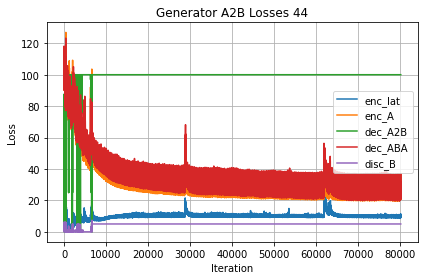

In [13]:
plot_train_hist(train_hist, ['enc_lat', 'enc_A', 'dec_A2B', 'dec_ABA', 'disc_B'], 'Generator A2B Losses '+n)

### Generator B2A Path

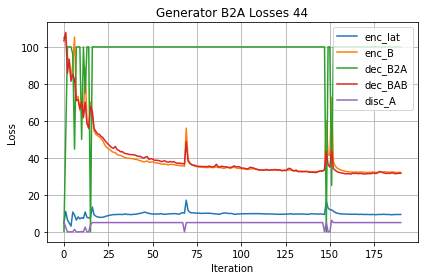

In [10]:
plot_train_hist(train_hist, ['enc_lat', 'enc_B', 'dec_B2A', 'dec_BAB', 'disc_A'], 'Generator B2A Losses '+n, epoch=True)

### Discriminators A and B

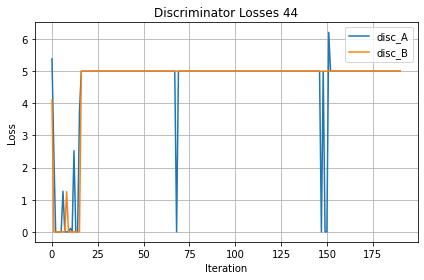

In [11]:
plot_train_hist(train_hist, ['disc_A', 'disc_B'], 'Discriminator Losses '+n, epoch=True)